In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Explotary data analysis

 UCI
dataset (Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan.
This is a classification problem. Number of instances is 748 and number of attributes is
5 which includes: R (Recency - months since last donation), F (Frequency - total number
of donatios), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007
(1 stand for donating blood; 0 stands for not donating blood)2
).

In [60]:
df = pd.read_excel(r"C:\Users\siava\OneDrive - University of Manitoba\D\Computer science\Data Science Projects\UCI-data-set---Multivariate-data---classification\Data\transfusion.xlsx")

In [61]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [63]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [64]:
df["whether he/she donated blood in March 2007"].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

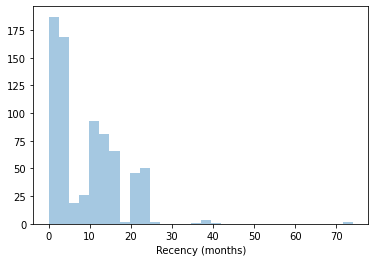

In [65]:
sns.distplot(df["Recency (months)"], kde=False)

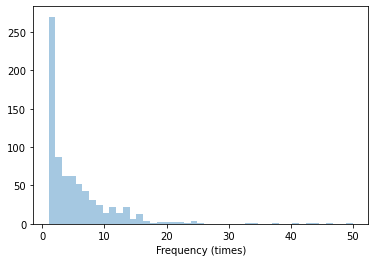

In [66]:
sns.distplot(df["Frequency (times)"], kde=False)

In [67]:
df["Frequency (times)"].value_counts()

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
16     13
14     13
13      9
15      6
17      4
24      3
19      2
20      2
21      2
22      2
46      1
18      1
23      1
26      1
33      1
34      1
38      1
41      1
43      1
44      1
50      1
Name: Frequency (times), dtype: int64

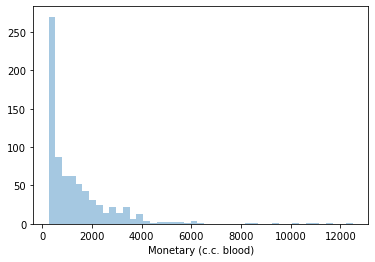

In [68]:
sns.distplot(df["Monetary (c.c. blood)"], kde=False)

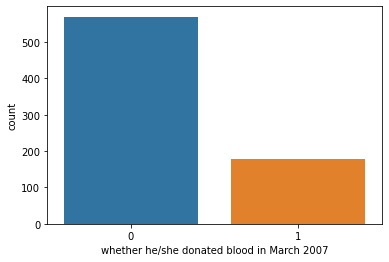

In [69]:
sns.countplot(df["whether he/she donated blood in March 2007"])

# Model Building: Hyper parameter Tuning

In [70]:
X = df.drop("whether he/she donated blood in March 2007", axis=1)
y = df["whether he/she donated blood in March 2007"]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [82]:
best_score = np.zeros((1,2))

for i in range(4,50):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    scores = cross_val_score(dt, X_train, y_train, cv=4)
    print(f"max_depth: {i}")
    print(scores)
    print(f"Scores mean: {scores.mean()}")
    print("\n")
    
    if scores.mean() > best_score[0,1]:
        best_score[0,1] = scores.mean()
        best_score[0,0] = i
    
print(f"entropy as heuristic:best_score and its max depth: {best_score}")

max_depth: 4
[0.77333333 0.74666667 0.79865772 0.77852349]
Scores mean: 0.7742953020134229


max_depth: 5
[0.75333333 0.76666667 0.79194631 0.76510067]
Scores mean: 0.769261744966443


max_depth: 6
[0.77333333 0.75333333 0.75838926 0.77852349]
Scores mean: 0.7658948545861297


max_depth: 7
[0.76666667 0.72666667 0.76510067 0.75167785]
Scores mean: 0.7525279642058165


max_depth: 8
[0.75333333 0.72666667 0.74496644 0.75838926]
Scores mean: 0.7458389261744967


max_depth: 9
[0.74666667 0.72       0.73154362 0.74496644]
Scores mean: 0.7357941834451902


max_depth: 10
[0.73333333 0.73333333 0.73154362 0.7114094 ]
Scores mean: 0.7274049217002237


max_depth: 11
[0.73333333 0.70666667 0.7114094  0.7114094 ]
Scores mean: 0.7157046979865772


max_depth: 12
[0.74       0.72666667 0.7114094  0.7114094 ]
Scores mean: 0.7223713646532439


max_depth: 13
[0.74666667 0.72       0.69798658 0.7114094 ]
Scores mean: 0.7190156599552573


max_depth: 14
[0.73333333 0.71333333 0.69127517 0.69798658]
Scores 

In [81]:
best_score = np.zeros((1,2))

for i in range(4,50):
    dt = DecisionTreeClassifier(criterion="gini", max_depth=i)
    scores = cross_val_score(dt, X_train, y_train, cv=4)
    print(f"max_depth: {i}")
    print(scores)
    print(f"Scores mean: {scores.mean()}")
    print("\n")
    
    if scores.mean() > best_score[0,1]:
        best_score[0,1] = scores.mean()
        best_score[0,0] = i
    
print(f"Gini as heuristic:best_score and its max depth: {best_score}")

max_depth: 4
[0.76666667 0.72       0.82550336 0.7852349 ]
Scores mean: 0.7743512304250559


max_depth: 5
[0.75333333 0.72       0.81879195 0.77852349]
Scores mean: 0.7676621923937359


max_depth: 6
[0.77333333 0.72666667 0.81208054 0.77852349]
Scores mean: 0.7726510067114094


max_depth: 7
[0.73333333 0.73333333 0.77181208 0.76510067]
Scores mean: 0.7508948545861297


max_depth: 8
[0.72666667 0.72       0.77181208 0.7114094 ]
Scores mean: 0.7324720357941835


max_depth: 9
[0.72       0.7        0.77852349 0.69127517]
Scores mean: 0.7224496644295302


max_depth: 10
[0.73333333 0.69333333 0.79194631 0.69798658]
Scores mean: 0.7291498881431767


max_depth: 11
[0.72666667 0.66666667 0.77852349 0.68456376]
Scores mean: 0.7141051454138703


max_depth: 12
[0.72       0.68       0.77181208 0.69798658]
Scores mean: 0.7174496644295302


max_depth: 13
[0.71333333 0.68       0.77852349 0.69798658]
Scores mean: 0.7174608501118569


max_depth: 14
[0.72       0.67333333 0.77181208 0.69127517]
Scores

# Model Building: entropy as the heuristic, Max_depth = 4

In [86]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[100  13]
 [ 21  16]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       113
           1       0.55      0.43      0.48        37

    accuracy                           0.77       150
   macro avg       0.69      0.66      0.67       150
weighted avg       0.76      0.77      0.76       150



# Model Building: gini as the heuristic, Max_depth = 4

In [95]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=4)
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[103  10]
 [ 23  14]]


              precision    recall  f1-score   support

           0       0.82      0.91      0.86       113
           1       0.58      0.38      0.46        37

    accuracy                           0.78       150
   macro avg       0.70      0.64      0.66       150
weighted avg       0.76      0.78      0.76       150



# K fold validation on the whole dataset

In [98]:
best_score = np.zeros((1,2))

for i in range(4,50):
    dt = DecisionTreeClassifier(criterion="gini", max_depth=i)
    scores = cross_val_score(dt, X, y, cv=4)
    print(f"max_depth: {i}")
    print(scores)
    print(f"Scores mean: {scores.mean()}")
    print("\n")
    
    if scores.mean() > best_score[0,1]:
        best_score[0,1] = scores.mean()
        best_score[0,0] = i
    
print(f"Gini as heuristic:best_score and its max depth: {best_score}")

max_depth: 4
[0.63101604 0.78609626 0.74331551 0.82887701]
Scores mean: 0.7473262032085561


max_depth: 5
[0.64705882 0.80213904 0.73262032 0.7540107 ]
Scores mean: 0.7339572192513368


max_depth: 6
[0.61497326 0.75935829 0.70588235 0.77540107]
Scores mean: 0.7139037433155081


max_depth: 7
[0.62032086 0.7486631  0.68449198 0.78074866]
Scores mean: 0.7085561497326204


max_depth: 8
[0.52406417 0.71122995 0.6684492  0.7540107 ]
Scores mean: 0.6644385026737968


max_depth: 9
[0.54545455 0.72192513 0.70588235 0.76470588]
Scores mean: 0.6844919786096256


max_depth: 10
[0.53475936 0.68449198 0.69518717 0.7486631 ]
Scores mean: 0.6657754010695187


max_depth: 11
[0.54545455 0.67914439 0.69518717 0.72192513]
Scores mean: 0.660427807486631


max_depth: 12
[0.53475936 0.68983957 0.71657754 0.72192513]
Scores mean: 0.6657754010695187


max_depth: 13
[0.54010695 0.70053476 0.72192513 0.72192513]
Scores mean: 0.6711229946524064


max_depth: 14
[0.54545455 0.67379679 0.71657754 0.71122995]
Scores 

In [99]:
best_score = np.zeros((1,2))

for i in range(4,50):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    scores = cross_val_score(dt, X_train, y_train, cv=4)
    print(f"max_depth: {i}")
    print(scores)
    print(f"Scores mean: {scores.mean()}")
    print("\n")
    
    if scores.mean() > best_score[0,1]:
        best_score[0,1] = scores.mean()
        best_score[0,0] = i
    
print(f"Gini as heuristic:best_score and its max depth: {best_score}")

max_depth: 4
[0.77333333 0.74666667 0.81208054 0.77852349]
Scores mean: 0.7776510067114095


max_depth: 5
[0.75333333 0.76666667 0.79194631 0.76510067]
Scores mean: 0.769261744966443


max_depth: 6
[0.77333333 0.75333333 0.75838926 0.77852349]
Scores mean: 0.7658948545861297


max_depth: 7
[0.76       0.73333333 0.76510067 0.75167785]
Scores mean: 0.7525279642058165


max_depth: 8
[0.76       0.71333333 0.74496644 0.75167785]
Scores mean: 0.7424944071588366


max_depth: 9
[0.75333333 0.7        0.73154362 0.73825503]
Scores mean: 0.7307829977628635


max_depth: 10
[0.74       0.72666667 0.73154362 0.7114094 ]
Scores mean: 0.7274049217002237


max_depth: 11
[0.74       0.74       0.7114094  0.71812081]
Scores mean: 0.7273825503355704


max_depth: 12
[0.74666667 0.71333333 0.7114094  0.70469799]
Scores mean: 0.7190268456375839


max_depth: 13
[0.74666667 0.70666667 0.67785235 0.7114094 ]
Scores mean: 0.7106487695749442


max_depth: 14
[0.74       0.72       0.69127517 0.70469799]
Scores 

In [ ]:
We can see thet,  we have reached the same 